In [80]:
import pandas as pd

In [81]:
# Dataset mein pehla column hamara already index hai so no need to have additional index, iske liye index_col = 0

matches = pd.read_csv("/content/drive/MyDrive/Aditya_ke_Projects/Football Match Prediction /Predict_Football_Matches_Dataset.csv",index_col = 0)

In [82]:
# same old checking the dataset has been loaded correctly or not

matches.head(10)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
8,2021-09-25,12:30,Premier League,Matchweek 6,Sat,Away,W,1.0,0.0,Chelsea,...,Match Report,NaN,15.0,3.0,16.5,0.0,0.0,0.0,2022,Manchester City
10,2021-10-03,16:30,Premier League,Matchweek 7,Sun,Away,D,2.0,2.0,Liverpool,...,Match Report,NaN,12.0,3.0,16.8,1.0,0.0,0.0,2022,Manchester City
11,2021-10-16,15:00,Premier League,Matchweek 8,Sat,Home,W,2.0,0.0,Burnley,...,Match Report,NaN,16.0,6.0,14.6,0.0,0.0,0.0,2022,Manchester City
13,2021-10-23,17:30,Premier League,Matchweek 9,Sat,Away,W,4.0,1.0,Brighton,...,Match Report,NaN,23.0,13.0,15.7,1.0,0.0,0.0,2022,Manchester City
15,2021-10-30,15:00,Premier League,Matchweek 10,Sat,Home,L,0.0,2.0,Crystal Palace,...,Match Report,NaN,14.0,3.0,17.0,0.0,0.0,0.0,2022,Manchester City


☝🏽 so as you can see above each of the rows are basically individual matches in the premier league

In [83]:
matches.shape

(1389, 27)

☝🏽 so we have 1389 rows and 27 columns

So in the premier league there are 38 matches played each season and there are 20 teams in the league each season. Also, the dataset has data for 2 seasons.

Therefore :

38 x 20 x 2 = 1520

1520 is the total number of matches,

but from the matches.shape output we saw that there are only 1389 rows so there seems to be some missing data.

so let's investigate this first...

In [84]:
# Let's figure out how many matches we have for each team in our data

matches["team"].value_counts()

team
Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: count, dtype: int64

☝🏽 you can see above that most of the squads are in the 70s, but some are in the 30s.

so basically in premier league 3 teams are relegated each year ( demoted to the lower league ) and 3 teams are promoted from the lower leagure to the premier league so we expect 6 teams to have fewer matches compared to the rest of the teams except those 6 falling in the relegate or promote window.

but as you can see above we have 7 teams which have fewer matches...

and Liverpool did NOT get relegated last season...

so let's investigate this...

In [85]:
# Let's take a look at just the Liverpool matches

matches[matches["team"] == "Liverpool"]

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,Match Report,NaN,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,...,Match Report,NaN,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,Match Report,NaN,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,...,Match Report,NaN,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,...,Match Report,NaN,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool
9,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,Sheffield Utd,...,Match Report,NaN,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
11,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,West Ham,...,Match Report,NaN,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool
13,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,Manchester City,...,Match Report,NaN,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool
14,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,Leicester City,...,Match Report,NaN,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool
16,2020-11-28,12:30,Premier League,Matchweek 10,Sat,Away,D,1.0,1.0,Brighton,...,Match Report,NaN,6.0,2.0,20.9,0.0,0.0,0.0,2021,Liverpool


☝🏽 if you notice the season col, we only have 2021 season ka data for liverpool, it should have the 2022 season aswell, but that's missing and hence the number is lower...

not a biggie

In [86]:
# Now let's take a look at the match data

# so the round column tells us the matchweek each match was played.

matches["round"].value_counts()

round
Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: count, dtype: int64

☝🏽 so the above tells us how many rows ( therefore matches ( 2 teams per match) ) we have for each week.

there are 10 matches per match week in the premier league and there 2 teams per match obviously, hence the number should be 40 instead of 39 in the rows that show 39, but as we saw that the 2022 season for liverpool is absent in the dataset that accounts for the 1 team ( liverpool ) not being shown and hence the number is 39 instead of being 40.

but you can also notice that some of the rows have way less value than even 39, actually the dataset has been pulled mid season, this why it is so...

again no biggie

In [87]:
# now that we have understood our data, let's do some cleaning

In [88]:
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

☝🏽 so the thing is that the ML algo we are using is not smart enough to understand non numeric data hence it wont be able to understand the columns which have the datatype as object.

so we gotta tackle that first

so let's create columns that we can use as predictors that are infact numeric.



In [89]:
# Let's convert our date column to date time datatype so that our algo can actually use it

# so let's convert the existing date column which is the object datatype to the date time datatype, overwriting it...

matches["date"] = pd.to_datetime(matches["date"])

In [90]:
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
dtype: object

☝🏽 see the change in dtype for date column

In [91]:
# so now let's actually start creating a pretty modest and basic ML model; for that lets first ready up some predictors...


In [92]:
# so the column venue tells us whether the match is happening in a home or an away ground for a team.
# A team playing in their Home field has a big advantage, its called " Home Field Luck "
# hence this is a good feature to have for making a predictor.
# but again as its not in numbers, we need to first convert it to numbers

# let's make the data in the venue column categorical

matches["venue_code"] = matches["venue"].astype("category").cat.codes

# so basically we created a new col venue_code and we used the venue col, where we converted it from strong to categories, there are 2 categories Home and away
# then we converted it to integers using cat.codes

matches


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,0
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,1
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,0
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,0


☝🏽 so above you can see the new column venue_code which is 0 for away and 1 for home

In [93]:
# now let's convert the team names of the opponents to numbers aswell

matches["opp_code"] = matches["opponent"].astype("category").cat.codes

matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sh,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0,18
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1,15
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1,0
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,0,10
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0,18
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,1,6
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,0,7
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,0,14


In [94]:
# so now let's take a look at the hour column, maybe some teams play good at some specific hour of the day, we could have actually investigated this maybe
# by doing some correlation ananlysis, but neend important hai dost

# if u look at the time col it is like this eg : 16:30
# so lets replace the colon and mins part with nothing by writing a regular expression and then convert it to int
matches["hour"] = matches["time"].str.replace(":.+","",regex = True).astype("int")


matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0,18,16
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1,15,15
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1,0,12
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,0,10,15
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,1,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0,18,19
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,1,6,15
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,0,7,19
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,0,14,18


In [95]:
# now lets create a number for each day of the week by just pulling in the day ( mon, tue) based on the date column

matches["day_code"] = matches["date"].dt.dayofweek

matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,16.9,1.0,0.0,0.0,2022,Manchester City,0,18,16,6
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,17.3,1.0,0.0,0.0,2022,Manchester City,1,15,15,5
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,14.3,0.0,0.0,0.0,2022,Manchester City,1,0,12,5
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,14.0,0.0,0.0,0.0,2022,Manchester City,0,10,15,5
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,15.7,1.0,0.0,0.0,2022,Manchester City,1,17,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,17.4,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,11.4,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,17.0,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,16.0,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2


In [96]:
# Lets create a base model
# lets first make the target,which would be whether the team won or not.
# so based on how we defined the target above lets take a look at the result col
# it has L,W,D so lets code L and D as 0 and W as 1, because we only care if the team won or not...

# so the below code just returns a boolean, if it's a win then it's TRUE, otherwise ( for Loss or Draw) its FALSE, then just make the TRUE AND FALSE as 1 or 0

matches["Target"] = (matches["result"] == "W").astype("int")

matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,Target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5,0
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6,1
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2,0


In [97]:
# FINALLY ! let's actually make a base model

In [98]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest can pickup non linearities in the data

# for eg hamara jo opp code has uska koi linear relationship toh hai nahi target se, opp code = 18 matlab opp code = 16 se zyada better, aisa thodina hai
# isko non linearities bolte hain iske liye in chizon ko linear regression pick nahi kar pata hence rfc use kiya idhar

# random forest is basically a series of decision trees, but each decision tree has slightly different parameters
# n_estimators is basically the number of individual decission trees we actually wanna train
# simple basha mein n_estimators jitna bada hoga utna zyada time lagega algo ko run hone mein but probably it will also give a more accurate ans relative to a lower
# n_estimators number

# min_samples_split jo hai vo basically is number of samples we wanna have in a leaf of the decision tree before we split the node
# the higher this is, the less likely we are to overfit, but the lower the accuracy on the training data will be.
# random state basically, random forest mein there are lots of random parameters.
# if we set a random state and we run the rfc multiple times we should get avgd out better results ig

rfc = RandomForestClassifier(n_estimators = 50, min_samples_split = 10, random_state = 1)

In [99]:
# Now lets split train and test

# this data is time series data, so we need to be extra careful while splitting it to ensure that all the data in the test set comes after the data in the train set.
# because in the real world you cant train an algorithm in the future and use it to predict data in the past, it has to be other way around
# you can only predict the future using the past

# so lets take all the matches before 2022 in our training set and our test set will be anything in 2022

train = matches[matches["date"] < "2022-01-01"]

test = matches[matches["date"] > "2022-01-01"]




In [100]:
# ab jo itna same numeric banaya and baaki thode un sab ko predictors kardete hain

predictors = ["venue_code","opp_code","hour","day_code"]

In [101]:
# bas ab model ko fit kar dete hain

rfc.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [102]:
# ab lets predict

preds = rfc.predict(test[predictors])

In [103]:
# ab sab ho gaya ab actually dekhte hain model kitna accurate hai

from sklearn.metrics import accuracy_score

# accuarcy_score tells us that if your model predicted win, what percentage of times was it actually a win or if your model predicted a loss, what percentage
# of times was it actually a loss basically it runs in parallel to the idea of precision in the classification report

acc = accuracy_score(test["Target"], preds)

In [104]:
acc

0.6123188405797102

☝🏽 kaafi wahiyaad model banaya khuda kasam, saara mood kharab kar diya, tauba tauba

In [105]:
# thoda deep mein dekhte hain hamare model ne kya kiya hai jisse itna bakwaas acc aaya

# so let's create a dataframe combining our actual values and our predicted values

combined = pd.DataFrame(dict(actual=test["Target"], prediction=preds))

In [106]:
# yeh combined waale dataframe ko visualize karne ke liye ek cross tab banate hain ab pandas use karke, this is comparable to apna woh confusion matrix

pd.crosstab(index=combined["actual"],columns=combined["prediction"])

prediction,0,1
actual,,
0,141,31
1,76,28


☝🏽 so you can see that when we predicted a loss or a draw most of the time (141) we were correct, but when we predicted a win we were actually wrong more often than we were right ( 31 > 28 )       : (

In [107]:
# but hamara model basically hai about predicting wins so lets try and use some other metric

from sklearn.metrics import precision_score

# yeh basically bataega ki when model predicted a win, how many times did the team actually win

pre = precision_score(test["Target"],preds)

In [108]:
pre

0.4745762711864407

Matlab ki jab hamara model bola ki win... 47 percent times hi actually mein win tha, isse acha coin flip karlete... 50 percent toh hota precision

In [109]:
# chalo then let's make our model better

In [110]:
# let's create some more predictors to improve the accuracy of our model, to this we will split the dataframe up by team because what we want to do is compute...
# rolling averages for team performance eg : how did this team do in the past few games, how many shots did they have, how many goals were scored against them, wagera.

# so lets create one dataframe for every squad in our data.

grouped_matches = matches.groupby("team")

In [111]:
group = grouped_matches.get_group("Manchester City")

In [112]:
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,Target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2021-05-01,12:30,Premier League,Matchweek 34,Sat,Away,W,2.0,0.0,Crystal Palace,...,1.0,0.0,0.0,2021,Manchester City,0,6,12,5,1
56,2021-05-08,17:30,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Chelsea,...,0.0,0.0,1.0,2021,Manchester City,1,5,17,5,0
57,2021-05-14,20:00,Premier League,Matchweek 36,Fri,Away,W,4.0,3.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Manchester City,0,14,20,4,1
58,2021-05-18,19:00,Premier League,Matchweek 37,Tue,Away,L,2.0,3.0,Brighton,...,1.0,0.0,0.0,2021,Manchester City,0,3,19,1,0


In [113]:
# so now lets compute rolling averages, basically what we want to do is if we are on matchweek 4, we want to see how did man city do in the previous 3 matchweeks
# then we can pass those rolling averages in the algo and then the algo can use that information to make better predictions
# for eg if they lost all the 3 previous games before matchweek 4 they are probably gonna loose matchweek 4 aswell...

# toh let's make the rolling averages waala function
# it will take a group in, it will take a set of columns that we need to compute rolling avegrages for
# it will take a set of new cols that we want to assign the rolling avgs to
# first we will sort the group by asc order of date cause we want to look at the last 3 matches the team played
# then we will create a variable called rolling stats that will take a set of cols then calculate the rolling avgs for 3 above, then we just take the mean
# then we assign the rolling stats back to our orignal dataframe
# then we drop any missing values because if we are in week there are no 3 previous weeks
# fir group return kardo

def rolling_averages(group, cols, new_cols):
  group = group.sort_values("date")
  rolling_stats = group[cols].rolling(3, closed="left").mean() # closed = "left" is very imp because if you dont do this it will compute the rolling avg for above 3...
  #  and assign that to matchweek 3, the problem with that is it uses knowledge of the future, lets say we are trying to predict what happens in week 3...
  # this rolling avg will actually include some of that into our week 3 data, DATALEAK !!!!!, so the closed = "left" basically takes the current week out and says...
  # pandas to ignore it.
  group[new_cols] = rolling_stats
  group = group.dropna(subset=new_cols)
  return group



In [114]:
# goals for, goals against, shots on target, distance travelled by shots, freekicks, penalty kicks, penalty kick attempts

cols = ["gf","ga","sh","sot","dist","fk","pk","pkatt"]



# just add rolling to the end of the col names
new_cols = [f'{c}_rolling' for c in cols]

In [115]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [116]:
# lets try our func

rolling_averages(group,cols,new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,Target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,...,5,1,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,...,5,0,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,...,5,1,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,...,6,0,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Premier League,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,...,5,0,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2022-03-14,20:00,Premier League,Matchweek 29,Mon,Away,D,0.0,0.0,Crystal Palace,...,0,0,2.333333,1.333333,19.000000,7.000000,15.366667,0.333333,0.333333,0.333333
44,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Away,W,2.0,0.0,Burnley,...,5,1,1.666667,0.333333,18.333333,7.333333,16.000000,0.333333,0.000000,0.000000
46,2022-04-10,16:30,Premier League,Matchweek 32,Sun,Home,D,2.0,2.0,Liverpool,...,6,0,2.000000,0.333333,20.000000,6.666667,16.133333,0.333333,0.000000,0.000000
49,2022-04-20,20:00,Premier League,Matchweek 30,Wed,Home,W,3.0,0.0,Brighton,...,2,1,1.333333,0.666667,15.666667,4.666667,16.700000,0.333333,0.000000,0.000000


☝🏽 the above is just for Manchester city ka matches, upar dekho, group ko...

In [117]:
# lets do the above for all the matches

matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x,cols,new_cols)) # basically the lambda applies this one function to each team

In [118]:
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 6  2020-10-04  14:00  Premier League   Matchweek 4   
                        7  2020-10-17  17:30  Premier League   Matchweek 5   
                        9  2020-10-25  19:15  Premier League   Matchweek 6   
                        11 2020-11-01  16:30  Premier League   Matchweek 7   
                        13 2020-11-08  19:15  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Premier League  Matchweek 29   
                        33 2022-03-18  20:00  Premier League  Matchweek 30   
                        34 2022-04-02  15:00  Premier League  Matchweek 31   
                        35 2022-04-08  20:00  Premier League  Matchweek 32   
                        36 2022-04-24  14:00  Premier League  Matchweek 34   

                            day venue result   gf   ga         opponent  ...  \
team                                                                     ...   
Arsenal                 6   Sun  Home      W  2.0  1.0    Sheffield Utd  ...   
                        7   Sat  Away      L  0.0  1.0  Manchester City  ...   
                        9   Sun  Home      L  0.0  1.0   Leicester City  ...   
                        11  Sun  Away      W  1.0  0.0   Manchester Utd  ...   
                        13  Sun  Home      L  0.0  3.0      Aston Villa  ...   
...                         ...   ...    ...  ...  ...              ...  ...   
Wolverhampton Wanderers 32  Sun  Away      W  1.0  0.0          Everton  ...   
                        33  Fri  Home      L  2.0  3.0     Leeds United  ...   
                        34  Sat  Home      W  2.0  1.0      Aston Villa  ...   
                        35  Fri  Away      L  0.0  1.0    Newcastle Utd  ...   
                        36  Sun  Away      L  0.0  1.0          Burnley  ...   

                            day_code  Target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 6          6       1    2.000000    1.333333   
                        7          5       0    1.666667    1.666667   
                        9          6       0    1.000000    1.666667   
                        11         6       1    0.666667    1.000000   
                        13         6       0    0.333333    0.666667   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 32         6       1    1.333333    1.000000   
                        33         4       0    1.666667    0.666667   
                        34         5       1    2.333333    1.000000   
                        35         4       0    1.666667    1.333333   
                        36         6       0    1.333333    1.666667   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 6    7.666667    3.666667    14.733333   0.666667   
                        7    5.333333    3.666667    15.766667   0.000000   
                        9    7.000000    3.666667    16.733333   0.666667   
                        11   9.666667    4.000000    16.033333   1.000000   
                        13   9.666667    2.666667    18.033333   1.000000   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 32  12.333333    3.666667    19.300000   0.000000   
                        33  12.333333    4.333333    19.600000   0.000000   
                        34  13.000000    5.333333    19.833333   0.000000   
                        35  13.000000    5.000000    18.533333   0.000000   
                        36  10.000000    4.666667    17.633333   0.000000   

                            pk_rolling

In [119]:
# hum log ko yeh team waala col chahiye nahi, toh usko drop kardete hain

matches_rolling = matches_rolling.droplevel("team")

In [120]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,Target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


☝🏽 upar if you see ki we have 1317 rows but hamra index sirf 36 tak jaata hai matlab bahut saare repeats hain index col mein, lets just remove those repeats and make them unique

In [121]:
matches_rolling.index = range(matches_rolling.shape[0])

# this just assigns the index col values from 0 to 1316

In [122]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,Target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
1313,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
1314,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
1315,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [123]:
# maybe if we want to make our algo even better in the future than we are going to get by using this rolling avg, lets just create a predictions function...
# this will make life easier while improving the algo

def make_predictions(data,predictors):
  # train split
  train = data[data["date"] < "2022-01-01"]
  # test split
  test = data[data["date"] > "2022-01-01"]
  # fit the model
  rfc.fit(train[predictors],train["Target"])
  # create the predictions
  preds = rfc.predict(test[predictors])
  # combine our predictions and actuals
  combined = pd.DataFrame(dict(actual=test["Target"], prediction=preds))
  # Calculate our precision
  pre = precision_score(test["Target"],preds)
  # return the values
  return combined,pre




In [124]:
  matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,Target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
1313,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
1314,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
1315,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [125]:
# let's call the function and get the predictions with our rolling averages ke saath waala dataset and using the initial predictors and the new cols


combined2,pre2 = make_predictions(matches_rolling, predictors + new_cols)

In [126]:
pre2

0.625

☝🏽 ab hamra model jab win bolta hai tab 47 ke jagah 62 percent times woh sahi hota hai...

In [128]:
combined2

,actual,prediction
55,0,0
56,1,0
57,1,0
58,1,1
59,1,1
...,...,...
1312,1,0
1313,0,0
1314,1,0
1315,0,0


☝🏽  The above doesn't really tell us about which team actually played in each match

In [129]:
# Let's fix this by adding some info to combined


combined2 = combined2.merge(matches_rolling[["date","team","opponent","result"]],left_index = True, right_index = True)

# Baically what pandas does over here is that it will look in combined2 and see some index eg 55 and match that index in matches_rolling
# ig its like natural join in dbms?


In [130]:
combined2

,actual,prediction,date,team,opponent,result
55,0,0,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1315,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L


In [132]:
# let's combine home and away data matlab ek team ka home dusre ka away and dono side se compare karke dekhte hain model ne kya kiya hai predictions mein
# dono jagah same rehna chahiye

# abhi ☝🏽 dekhenge toh yeh wolverhampton wandererers is wolves in opponent cols toh yeh sab sahi karte hain pehle

matches_rolling["team"].unique()


array(['Arsenal', 'Aston Villa', 'Brentford', 'Brighton and Hove Albion',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Norwich City',
       'Sheffield United', 'Southampton', 'Tottenham Hotspur', 'Watford',
       'West Bromwich Albion', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)

In [133]:
matches_rolling["opponent"].unique()

array(['Sheffield Utd', 'Manchester City', 'Leicester City',
       'Manchester Utd', 'Aston Villa', 'Leeds United', 'Wolves',
       'Tottenham', 'Burnley', 'Southampton', 'Everton', 'Chelsea',
       'Brighton', 'West Brom', 'Crystal Palace', 'Newcastle Utd',
       'West Ham', 'Liverpool', 'Fulham', 'Brentford', 'Norwich City',
       'Watford', 'Arsenal'], dtype=object)

In [134]:
# ☝🏽  yeh upar jo aise discrepancies dikh rahi hai na team ke cols ka Manchester United opponents mein Manchester Utd hai yeh sab lamda func use karke fix karte hain
# ManU ke alawa aur bhi hain dekho dyaan se

# toh idhar ham ek class bana rahein hain jo inherit karta hai from dict class kyuki by defaults jo map hai woh missing keys nahi handle karega, bas remove kar dega
# aur hamein kya chahiye ki agar koi team name missing hai woh bas usse replace kar de orignal name ke saath
class MissingDict(dict):
  __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton",
              "Manchester United": "Manchester Utd",
              "Newcastle United": "Newcastle Utd",
              "Tottenham Hotspur": "Tottenham",
              "West Ham United": "West Ham",
              "Wolverhampton Wanderers": "Wolves"}

# creating an instance of missing dict

mapping = MissingDict(**map_values)

In [135]:
# lets test if it works

mapping["Wolverhampton Wanderers"]

'Wolves'

In [138]:
# now let's use this in the pandas map method

combined2["new_team"] = combined2["team"].map(mapping)

In [139]:
# now let's merge the dataframe with itself

merged = combined2.merge(combined2,left_on = ["date","new_team"],right_on = ["date","opponent"])

# so this basically just merges the dataframe with itself and we can check 2 way now, ek ka home tha dusre ka away tha toh dono side ka data dikhega isse

merged

,actual_x,prediction_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
1,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,Everton,Wolves,L,Everton
258,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,Leeds United,Wolves,W,Leeds United
259,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,Aston Villa,Wolves,L,Aston Villa
260,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,Newcastle United,Wolves,W,Newcastle Utd


In [142]:
# let's see all the rows where one team was predicted to win and one team was predicted to loose, yeh waale rows hain jisme hamare algo ko zyada confidence hai

merged[(merged["prediction_x"] == 1 ) & (merged["prediction_y"] == 0 )]["actual_x"].value_counts()

# we are basically checking when model predicted team A would win and team B would loose what exactly happened ?

actual_x
1    27
0    13
Name: count, dtype: int64

27 / 40 = 0.675

bina koi ML lagaye 0.625 se 0.675 kardi accuracy hamne with some common sense

In [ ]:
# Yeh model ko better kaise banaye ?

# jo data use kiya hai usme sirf 2 seasons ka data hai so maybe hum aur zyada seasons ka data le, 10 to 20 seasons
# use more predictors
# using a neural network ? koi bhi Algo jo non linear relationships ko pick kar sakti hai, but yeh pata kaise chalta hai ?


Some visualizations !

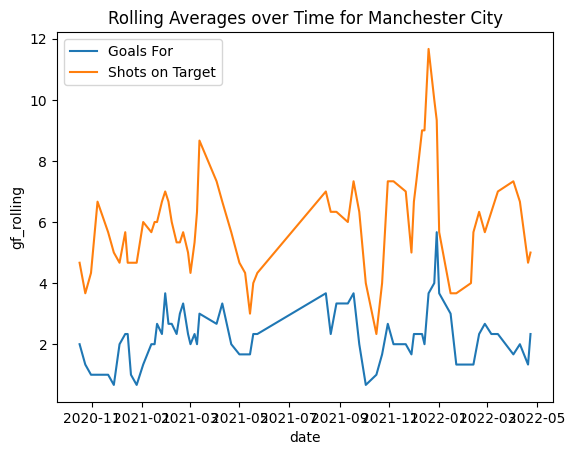

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Line Plot for Rolling Averages
team_of_interest = 'Manchester City'
data_for_team = matches_rolling[matches_rolling['team'] == team_of_interest]

sns.lineplot(data=data_for_team, x='date', y='gf_rolling', label='Goals For')
sns.lineplot(data=data_for_team, x='date', y='sot_rolling', label='Shots on Target')
plt.title(f'Rolling Averages over Time for {team_of_interest}')
plt.show()



Goals For (gf_rolling):

  There has been an increase in Manchester City's rolling average goals scored over the period displayed in the graph. This suggests that Manchester City's offense has been improving over time.

Shots on Target (sot_rolling):

  The rolling average for Manchester City's shots on target has also been increasing over time. This suggests that Manchester City is not only creating more scoring opportunities but also placing their shots on target more frequently.

Overall, the rolling averages suggest that Manchester City's attacking performance has been improving over the time period shown in the graph. They are scoring more goals and creating more scoring chances.

In [148]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions (adjust ranges and other parameters as needed)
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],  # None allows trees to grow to full depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a new Random Forest instance for tuning
rfc_tuning = RandomForestClassifier(random_state=1)

# Create the tuning object
random_search = RandomizedSearchCV(rfc_tuning, param_distributions=param_distributions,
                                   n_iter=20, cv=3, random_state=1)

# Fit to your training data (make sure you still use the time-based split!)
random_search.fit(train[predictors], train["Target"])

# Best parameters and best score
print(random_search.best_params_)
print(random_search.best_score_)

# Use the best estimator going forward
rfc = random_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
0.6314363143631436
